In [1]:
from fenics import *
import numpy as np

### Example 1: https://engineering.purdue.edu/~djiao/ee618/classnote/Lect16-FEM-Example-BasicSteps.pdf

In [2]:
# Create mesh and define function space
# IntervalMesh(nx, a, b)
# nx (int) The number of cells, a (float) The minimum point (inclusive), b (float) The maximum point (inclusive).
mesh = IntervalMesh(300, 0, 1)


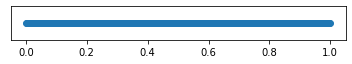

In [3]:
plot(mesh)

In [4]:
V = FunctionSpace(mesh, "P", 2)
u_D = Expression("pow(x[0], 3)/6 + pow(x[0], 2)/2 + x[0]/3", degree=2)
f = Expression("x[0] + 1", degree=1)

# Define boundary condition

u_L = Constant(0)
u_R = Constant(1)

def boundary_L(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], u_L, tol)

def boundary_R(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], u_R, tol)

bc_L = DirichletBC(V, u_L, boundary_L)
bc_R = DirichletBC(V, u_R, boundary_R)

bcs = [bc_L, bc_R]

In [5]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = -dot(grad(v), grad(u))*dx
L = v * f* dx

In [6]:
# Compute solution
u = Function(V)
solve(a == L, u, bcs)

Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/edwardtang/anaconda3/envs/fenics2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


In [1]:
plot(u)

NameError: name 'plot' is not defined

In [8]:
vtkfile = File("poisson/firstTestFEM.pvd")
vtkfile << u

In [9]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, "L2")

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))


In [10]:
# Print errors
print("error_L2 =", error_L2)
print("error_max =", error_max)

error_L2 = 2.1300695253634194e-10
error_max = 4.604983061540224e-12
